<a href="https://colab.research.google.com/github/arundhathips/DataScienceLab_arundhathi10/blob/main/ARUNDHATHI_23_11_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hunting Exoplanets In Space - Scatter & Line Plots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the training dataset.
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/exoTrain.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
# Display Statistical information of the train dataset
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.00000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,1.410852e+02,1.124563e+02,1.050821e+02,7.720985e+01,60.143330,17.630999,-54.355089,-103.08460,-144.560114,-113.322037,-68.828616,-32.839733,31.196475,88.517940,175.080436,233.700224,281.801687,4.643881e+02,5.347781e+02,5.686202e+02,5.575065e+02,5.667802e+02,5.469081e+02,1.775987e+02,1.977492e+02,2.291148e+02,2.441020e+02,2.501690e+02,2.613476e+02,2.326228e+02,...,8.001983e+02,8.456118e+02,7.564445e+02,116.982994,158.543973,129.188885,5.817181,-97.778421,-84.500629,-2.522744,125.509414,354.448954,6.254212e+02,8.012768e+02,106.772064,80.353945,12.455127,-94.172579,-181.646112,-320.240619,-358.358437,-323.468262,-281.609027,-213.522064,-107.086774,-110.572898,-71.794968,-31.777614,72.747847,126.815573,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,1.942289e+04,1.832810e+04,1.768321e+04,1.731920e+04,16647.817648,16725.088231,17162.322247,17356.98839,16979.436723,16011.508248,15118.835589,14255.363528,14048.475841,14618.614614,15246.020915,16803.416700,17930.530299,2.523553e+04,2.704750e+04,2.964609e+04,3.315534e+04,3.679672e+04,4.144422e+04,2.071160e+04,2.108089e+04,2.144121e+04,2.175216e+04,2.180420e+04,2.164199e+04,2.132321e+04,...,5.116648e+04,5.829319e+04,5.898207e+04,16075.902775,16263.350901,15613.273881,14397.292446,14887.907167,14466.376116,12079.533421,12455.557157,20116.003038,3.307799e+04,4.613980e+04,15648.242604,15514.533197,14142.137616,13113.457203,13161.476260,14165.866392,15083.632082,14587.243316,13548.583112,11544.505620,10369.103689,10653.997273,10238.433598,10849.383610,16548.155180,20119.224581,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,-2.223300e+05,-2.279016e+05,-2.996757e+05,-4.453612e+05,-557042.690000,-695994.840000,-815633.560000,-880865.85000,-892477.410000,-85

In [ ]:
# Check the number of rows and columns in the 'exo_train_df'.
df.shape

(5087, 3198)

---

#### Check For The Missing Values


In [ ]:
df.columns

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)

In [ ]:
c=0
for i in  df.columns:
  for item in df[i].isnull():
    if item==False:
      c+=1
c

16268226

In [ ]:
# Find the total number of missing values in the 'exo_train_df'.
df.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

There are no missing values in the DataFrame.

---

#### Slicing A DataFrame Using The `iloc[]` Function
Create Pandas series for the first 3 stars and the last 3 stars in the DataFrame.

**Syntax:** 

`dataframe_name.iloc[row_position_start : row_position_end, column_position_start : column_position_end]`

In this syntax: 

- `row_position_start` denotes the position of the row in the DataFrame **starting** from whose values you want to take in the new Pandas series or DataFrame.
- `row_position_end` denotes the position of the row in the DataFrame till whose values you want to take in the new Pandas series or DataFrame.
- `column_position_start` denotes the position of the column in the DataFrame **starting** from whose values you want to take in the new Pandas series or DataFrame.
- `column_position_end` denotes the position of the column in the DataFrame till whose values you want to take in the new Pandas series or DataFrame.

You can verify manually whether we have extracted the values from the first row or not by viewing the first 5 rows of the DataFrame using the `head()` function.

In [ ]:
# Create a Pandas series for the first star and store it in a variable called 'star_0'.
star_0 =df.iloc[0, :]
star_0.head()

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

In [ ]:
type(star_0)

pandas.core.series.Series

In [ ]:
# Create a Pandas series for the second star and store it in a variable called 'star_1'.
star_1=df.iloc[1,:]
star_1.head()

LABEL      2.00
FLUX.1   -38.88
FLUX.2   -33.83
FLUX.3   -58.54
FLUX.4   -40.09
Name: 1, dtype: float64

In [ ]:
# Create a Pandas series for the third star and store it in a variable called 'star_2'.
star_2=df.iloc[2,:]
star_2.head()

LABEL       2.00
FLUX.1    532.64
FLUX.2    535.92
FLUX.3    513.73
FLUX.4    496.92
Name: 2, dtype: float64

In [ ]:
# Create a Pandas series for the last star and store it in a variable called 'star_5086'.
star_5086=df.iloc[5086,:]
star_5086.head()

LABEL       1.00
FLUX.1    323.28
FLUX.2    306.36
FLUX.3    293.16
FLUX.4    287.67
Name: 5086, dtype: float64

### Scatter and Line Plots of Flux

Now plot the **Flux** values on the  $y-axis$ for each observation for a star. On $x-axis$, we will plot numbers ranging from `1` to `3197`.


#### Scatter And Line Plots For First 3 Stars^

To make this plot, 

1. We first need to import a Python module named `matplotlib.pyplot` with `plt` as an alias. This module is exclusively designed for creating graphs such as bar graphs, histogram, line plot, scatter plot etc. We will learn more about this module as we go on in this course. 

  ```
  import matplotlib.pyplot as plt
  ```

2. Then we need to call the `figure()` function from the `plt` module to resize the plot. The `figure()` function takes `figsize=(horizontal_width, vertical_height)` parameter as an input.  

  ```
  plt.figure(figsize=(16, 4))
  ```

3. Then we need either a Python list, a NumPy array or a Pandas series containing the numbers between `1` and `3197` to plot them on the $x-axis$.

  ```
  x_values_star_0 = np.arange(1, 3198)
  ```

4. Then we need `star_0` Pandas series to plot the `FLUX` values on the $y-axis$ for the first star in the DataFrame. 

  ```
  y_values_star_0 = star_0[1:]
  ```

5. Then we need to call the `scatter()` function from the `plt` module with the required inputs as described in the third and the fourth steps.

  ```
  plt.scatter(x_values_star_0, y_values_star_0)
  ```

6. Finally, we need to call the `show()` function from the `plt` module.

  ```
  plt.show()
  ```

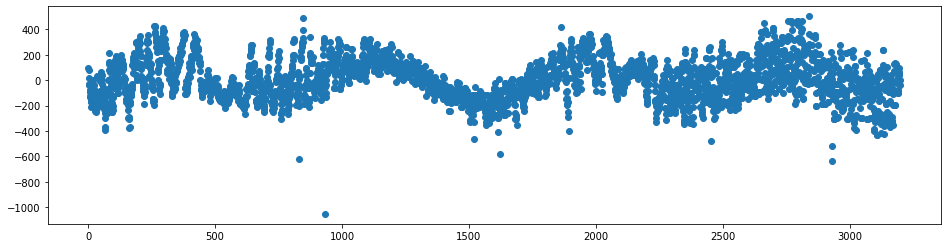

In [ ]:
#Create a scatter plot for 'star_0' Pandas series.
# 1. Import the 'numpy' and 'matplotlib.pyplot' modules.
import numpy as np
import matplotlib.pyplot as plt



# 2. Call the 'figure()' function to resize the plot.
plt.figure(figsize=(16,4))

# Here, 16 means the plot is 16 units wide and 4 units high. Play with these numbers to draw different sized plots.
# Call the 'scatter()' function to make a scatter plot between the x and y values.
# The scatter() function requires two inputs: x and y where x is the data to be plotted on the x-axis and y is the data to be plotted on the y-axis.
# In our case, x is a Pandas series of numbers between 1 and 3197 and y is the 'FLUX' values for a star.
x_values_star0=np.arange(1,3198)
y_values_star0=star_0[1:]
plt.scatter(x_values_star0,y_values_star0)
plt.show()



# Here, star_0[1:] is a Pandas series containing all the 'FLUX' values starting from the value at index 1 till the value at last index, i.e., 3197
# The 'arange(1, 3198)' function from the 'numpy' module will generate numbers from 1 to 3197.
# 3. Call the 'scatter()' function.



# 4. Call the 'show()' function.

# The 'show()' function displays the plot.

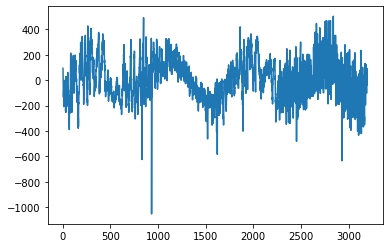

In [ ]:
#create a line plot for first star star_0
plt.plot(x_values_star0,y_values_star0)


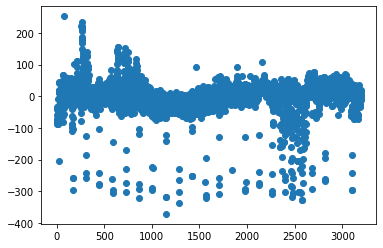

In [ ]:
# Create a scatter plot for the second star, i.e., 'star_1'.
y_values_star_1=star_1[1:]
plt.scatter(x_values_star0,y_values_star_1)



The line plot also confirms the periodic downward-peaks in the `FLUX` values.

It is quite difficult to spot any clear pattern in the scatter plot for the second star in the DataFrame. Let's draw a line plot to identify a pattern.

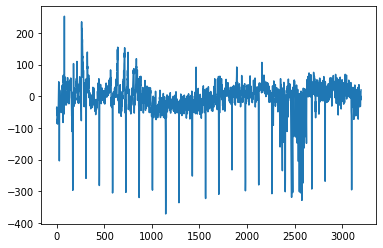

In [ ]:
# Create a line plot for the second star, i.e., 'star_1'.

plt.plot(x_values_star0,y_values_star_1)


As we can see, there are consistent sudden drops in the brightness levels for the second star in the DataFrame. This suggests that the planet is orbiting its star at very high radial speed. Also, the planet could be very close to the star.



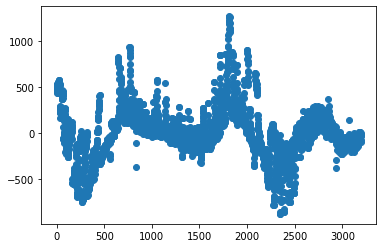

In [ ]:
#Create a scatter plot for the third star, i.e., 'star_2'.
y_values_star_2=star_2[1:]
plt.scatter(x_values_star0,y_values_star_2)


Here also, we can spot a clear repetitive downward-peaks which confirms that the star has at least one planet.

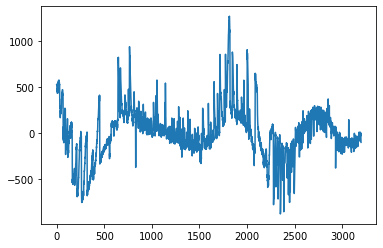

In [ ]:
#Create a line plot for the third star, i.e, 'star_2'.
plt.plot(x_values_star0,y_values_star_2)



The line plot also confirms the repetitive downward-peak pattern.

---

#### Scatter Plots And Line Plots For 2nd Last  Star^^^
Now, create the scatter plots and line plots for 2nd Last  Star or any star in the DataFrame which have been labelled or classified as `1`.

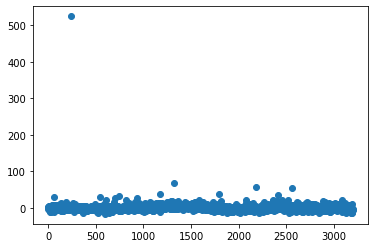

In [ ]:
# Create a scatter plot for the second-last star, i.e., 'star_5085' in the DataFrame.
star_second_last=df.iloc[-2,:]
y_values_second_last=star_second_last[1:]
plt.scatter(x_values_star0,y_values_second_last)
plt.show()

There is no clear periodic downward-peak pattern in the `FLUX` values for the second-last star.

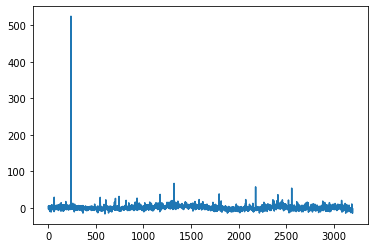

In [ ]:
# Student Action: Create a line plot for the second-last star in the DataFrame.

plt.plot(x_values_star0,y_values_second_last)
plt.show()

The line-plot also confirms that there is no clear periodic downward-peak pattern in the `FLUX` values.